In [1]:
#using Revise
addprocs(4)
using LightDarkPOMDPs, CMDPs
using POMDPs, POMDPToolbox, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = LightDark2D()
b = DPWBandit(mdp)
solver = ModularSolver(mdp, b)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

2-element StaticArrays.SArray{Tuple{2},Float64,1,2}:
 2.0
 2.0

In [4]:
hr = HistoryRecorder(; max_steps=10, rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

In [5]:
h.state_hist

11-element Array{StaticArrays.SArray{Tuple{2},Float64,1,2},1}:
 [2.0, 2.0]             
 [1.7587, 1.42123]      
 [1.03338, 1.33341]     
 [0.46245, 0.00566742]  
 [0.466937, 0.157766]   
 [-0.284811, -0.491353] 
 [-0.179806, -0.250035] 
 [-0.111157, -1.04886]  
 [0.236344, -0.290274]  
 [-0.0340027, -0.301047]
 [0.524748, -0.5197]    

In [6]:
h.action_hist

10-element Array{StaticArrays.SArray{Tuple{2},Float64,1,2},1}:
 [-0.241302, -0.578774] 
 [-0.725317, -0.0878144]
 [-0.570931, -1.32774]  
 [0.00448742, 0.152098] 
 [-0.751748, -0.649119] 
 [0.105004, 0.241319]   
 [0.0686487, -0.798827] 
 [0.347501, 0.758587]   
 [-0.270347, -0.0107724]
 [0.558751, -0.218653]  

In [7]:
h.reward_hist

10-element Array{Float64,1}:
 -4.1966  
 -2.82335 
 -2.46736 
 -0.118523
 -0.6147  
 -0.195903
 -0.368843
 -0.90434 
 -0.106661
 -0.225898

In [8]:
## Study

In [9]:
study = RewardvsN(LightDark2D)

CMDPs.RewardvsN
  mdp: LightDarkPOMDPs.LightDark2D
  bandits: Array{DataType}((1,))
  n_seeds: Int64 200
  n_iters: Array{Int64}((7,)) [50, 100, 200, 500, 1000, 1500, 2000]
  max_steps: Int64 10


In [10]:
result = run_study(study)

CMDPs.RewardvsNResult("LightDark2D", 1400×4 DataFrames.DataFrame
│ Row  │ alg            │ seed │ n_iters │ r_total  │
├──────┼────────────────┼──────┼─────────┼──────────┤
│ 1    │ MCTS.DPWBandit │ 1    │ 50      │ -14.9541 │
│ 2    │ MCTS.DPWBandit │ 2    │ 50      │ -11.7555 │
│ 3    │ MCTS.DPWBandit │ 3    │ 50      │ -16.931  │
│ 4    │ MCTS.DPWBandit │ 4    │ 50      │ -16.7443 │
│ 5    │ MCTS.DPWBandit │ 5    │ 50      │ -10.5971 │
│ 6    │ MCTS.DPWBandit │ 6    │ 50      │ -9.23563 │
│ 7    │ MCTS.DPWBandit │ 7    │ 50      │ -11.8295 │
│ 8    │ MCTS.DPWBandit │ 8    │ 50      │ -11.1981 │
│ 9    │ MCTS.DPWBandit │ 9    │ 50      │ -9.35756 │
│ 10   │ MCTS.DPWBandit │ 10   │ 50      │ -17.0757 │
│ 11   │ MCTS.DPWBandit │ 11   │ 50      │ -13.0557 │
⋮
│ 1389 │ MCTS.DPWBandit │ 189  │ 2000    │ -8.29574 │
│ 1390 │ MCTS.DPWBandit │ 190  │ 2000    │ -8.09038 │
│ 1391 │ MCTS.DPWBandit │ 191  │ 2000    │ -10.6952 │
│ 1392 │ MCTS.DPWBandit │ 192  │ 2000    │ -7.2947  │
│ 1393 │ MCTS.D

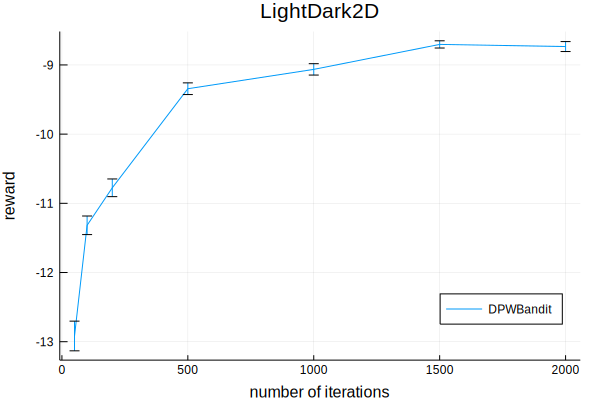

In [11]:
plot(result)